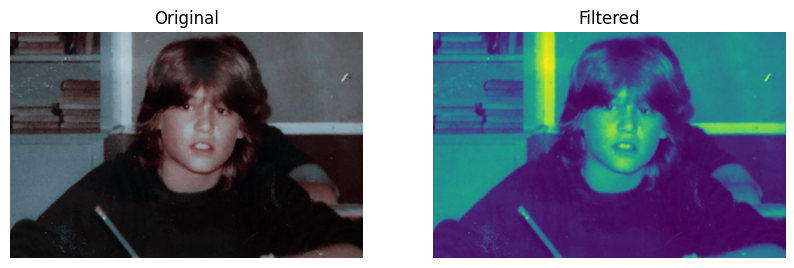

In [2]:
import torch
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

img_path = 'John_Depp.jpg'
image = Image.open(img_path)
transform = transforms.Compose([
    transforms.ToTensor()
])

image_tensor = transform(image).unsqueeze(0)

filter_weights = torch.tensor([
    [[1, 2, 1],
     [2, 4, 2],
     [1, 2, 1]],
    [[1, 2, 1],
     [2, 4, 2],
     [1, 2, 1]],
    [[1, 2, 1],
     [2, 4, 2],
     [1, 2, 1]]
], dtype=torch.float32).unsqueeze(0)

output = F.conv2d(image_tensor, filter_weights, padding=1)


output_np = output.squeeze(0).permute(1, 2, 0).detach().numpy()


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_np)
plt.title("Filtered")
plt.axis('off')

plt.show()